## **Introduction**

### **What is Image Classification?**

* Involves the process of teaching a computer to recognize and categorize objects in images.

  * The computer looks for important features in the image like shapes, colours and textures.

* Deep learning models such as Convolutional Neural Networks (CNNs) are great at recognizing these features to identify objects.

  * The computer is trained using lots of labelled images.

* It learns to connect the image features to the correct label by making mistakes and improving itself over time.

* After being trained, the model can classify new images it has not seen before.
  * It looks at the features in the image and picks the most likely label, based on what it learned.

* Image classification is used in areas like facial recognition, medical imaging and self-driving cars.

* However, working with images can be tricky due to challenges like different lighting, angles or clutter in the background.
  * This is also known as noisy data.

* In essence, Image classification is all about teaching computers to see real world objects just as a human would and categorize images using patterns they have learned from plenty of examples.

<br>
(Viso.AI, n.d.)

(Zhang et al., 2020)

(Papers with Code, n.d.)

(Abiyev et al., 2020)

(Taha et al., 2023)

(University of Zurich, n.d.)

### **What are Convolutional Neural Networks?**

* A type of specialized neural network designed for processing visual data such as images and videos.

  * They are made up of layers of interconnected nodes that learn to extract features and make predictions.

* Convolutional Neural Networks mainly consist of:

  * Convolutional Layers
    * The heart of a CNN lies in its convolutional layers, which apply filters (or kernels) to the input data to detect patterns.
    * This process helps identify certain shapes, edges, textures and other relevant features.

  * Pooling Layers
   * Pooling layers reduce the dimensionality of the feature maps extracted by convolutional layers.
   * This downsampling helps make the network more robust to variations in the input data and reduces computational complexity.

  * Fully Connected Layers
    * After several convolutional and pooling layers, the extracted features are fed into fully connected layers similar to those in traditional neural networks.
    * These layers perform the final classification or regression tasks.

* Applications
  * CNNs are widely used in various fields, including image classification, object detection, image segmentation, natural language processing and medical image analysis.
  * Their ability to learn hierarchical features makes them particularly effective for complex tasks.

<br>
(Goodfellow, Bengio and Courville, 2016)

(Albawi, Mohammed and Al-Zawi, 2017)

(Rawat and Wang, 2017)

(LeCun et al., 1989)

(Krizhevsky, Sutskever and Hinton, 2012)



###**Why This Dataset?**

  * Specifically, what makes this image dataset suitable for image classification?

    * The dataset is organized into distinct folders, each representing a specific food category (e.g. Pizza, Burger, French Fries, etc.).
      * This clear categorization provides well-defined labels for training an image classification model.
      * The model can learn to associate visual features with each specific food category.

    * The image dataset contains a satisfactory number of images for each food category.
      * A large number of images is crucial for training a robust and accurate classification model.
      * This will allow the model to learn a variety of visual patterns and variations within each category.

    * Food images often exhibit variations in lighting, angles and presentation.
      * Real-world images like these are beneficial for training as they help the model to generalize and perform well on diverse inputs.

    * The images within each category are labelled consistently.
      * Consistent labeling is essential for effective model training.
      * If there are inconsistencies or errors in labelling, it could hinder the model's learning process.

    * The code uses Convolutional Neural Networks (CNNs) for image classification.
      * This type of dataset, with clear categories and visual features, is well-suited for CNNs.
      * CNNs excel at extracting hierarchical features from images, which is crucial for classification tasks.


### **Purpose of the Analysis**

* The core goal is to develop an algorithm to automatically recognize and categorize food items from images.
  * This involves training a CNN model to identify patterns and features that distinguish different food categories.

* After training, the analysis will include assessing the performance of the model using various classification metrics.
  * This step determines how well the model generalizes to new images and its overall effectiveness in food item classification.

* Through exploratory data analysis (EDA), the analysis shall provide insights into the dataset itself, such as the distribution of food classes and any potential bias.
  * These insights will help in understanding our data better and refining the model for improved performance.

* Ultimately, this analysis will demonstrate the potential of deep learning to be used in real-world applications such as:
  * Automated food recognition systems
  * Dietary tracking apps
  * Assisting visually impaired individuals in identifying food items.



## **Step-By-Step Analysis Walkthrough**

### **00. Package Imports**

* Below are the relevant libraries and packages that will be used in this notebook.

**For Installation Or Updates**

In [ ]:
try:
  import tensorflow
except:
  %pip install tensorflow
  import tensorflow

%pip install gdown
%pip install scikit-learn

**Plotting and Analysis Dependencies**

In [ ]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
from IPython.display     import Image, clear_output

plt.style.use('dark_background')

**File Access Dependencies**

In [ ]:
import zipfile
import os
import glob
import gdown

***scikit-learn* Dependencies**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.base            import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import classification_report, confusion_matrix, ConfusionMatrixDisplay

***TensorFlow* Dependencies**

In [ ]:
import tensorflow                         as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models              import Sequential
from tensorflow.keras.layers              import Dense, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.applications        import MobileNetV2
from tensorflow.keras.utils               import load_img, img_to_array
from tensorflow.keras.optimizers          import Adam

**Other**

In [ ]:
import warnings

warnings.filterwarnings('ignore', category = UserWarning)

###**01. Data Extraction**

  * The images were originally downloaded from the *Kaggle* website.
    * Source URL: https://www.kaggle.com/datasets/harishkumardatalab/food-image-classification-dataset

**Creating Folder in Current Directory**

* Below, we are going to create a folder in the current working directory.

In [ ]:
KIMESHAN_DIR = os.path.join(os.getcwd(), 'KIMESHAN_POE')

if not os.path.exists(KIMESHAN_DIR):
  os.makedirs(KIMESHAN_DIR)

**Downloading Zipped Folder**



* Here, we are downloading the zipped folder from *Google Drive* which contains all our food images.

In [ ]:
DRIVE_URL  = str('https://drive.google.com/uc?id=1XV1-Tg6_Im6kS4HiK-hIsfrVvb95fxVH')
ZIPPED_DIR = str(os.path.join(KIMESHAN_DIR, 'ZIPPED_FOOD_FOLDER.zip'))

if not os.path.exists(ZIPPED_DIR):
  print('Download in progress...')

  gdown.download(DRIVE_URL, ZIPPED_DIR, quiet = True, use_cookies = False)
  clear_output(wait = True)

  print('Download complete.')
else:
  pass

Download complete.


**Extracting Images**

* Lastly, we are going to unzip the images from the downloaded folder.

In [ ]:
UNZIPPED_DIR = str(os.path.join(KIMESHAN_DIR, 'UNZIPPED_FOOD_FOLDER'))

print('Extraction in progress...')

with zipfile.ZipFile(ZIPPED_DIR, 'r') as ZIP_REF:
  ZIP_REF.extractall(UNZIPPED_DIR)
clear_output(wait = True)

if os.path.exists(ZIPPED_DIR):
  os.remove(ZIPPED_DIR)
else:
  pass

print('Extraction complete.')

Extraction complete.


### **02. Data Formatting**

**Accessing Data from Subfolders**

* The code below is going to create a dictionary to organize our food images into categories.

  * It is going to find all the food classes (the subfolder names).
* For each category, it will create an entry in the dictionary (the food keys).
  * It will then look at all the image file directories within each category folder.
* Lastly, it will add the directory paths of these images to the dictionary for that category (the directory values).

In [ ]:
MAIN_FOLDER  = str(UNZIPPED_DIR + '/Food Classification dataset')
SUBFOLDERS   = [F.name for F in os.scandir(MAIN_FOLDER) if F.is_dir()]
FOOD_CLASSES = {}

for SUBFOLDER in SUBFOLDERS:
  FOOD_CLASSES[SUBFOLDER] = []

for FOOD_KEY in FOOD_CLASSES.keys():
  for IMG in glob.glob(f'{MAIN_FOLDER}/{FOOD_KEY}/*'):
    FOOD_CLASSES[FOOD_KEY].append(IMG)

**Creating a DataFrame**

* This code will create a table (known as a DataFrame)

* The DataFrame will contain two columns:

  * `Image_Directory`
    * This column contains the location of each food image in the current directory where the image folder is present.

  * `Food_Name`
    * This column contains the name of the food in the image (like Pizza or Burger).

* The code below does the following:

  * Gathers Image Data
    * It collects all the food images and their classes.

  * Creates the Table
    * It organizes the image locations and food names into a neat table.

  * Cleans Up Names
    * It makes the food names look nicer by replacing underscores with spaces and capitalizing the first letter of each word (e.g. French_Fries becomes French Fries).

  * Shuffles the Table
    * It mixes up the order of the rows in the table so that the images are in a random order.
    * This is important for adequate sample representation.

In [ ]:
DATA            = [(value, key) for key, values in FOOD_CLASSES.items() for value in values]
DF              = pd.DataFrame(DATA, columns = ['Image_Directory', 'Food_Name'])
DF['Food_Name'] = DF['Food_Name'].str.replace('_', ' ').str.title()
DF              = DF.sample(frac = 1, random_state = 37).reset_index(drop = True)

**Dataset Preview**

* Below is a preview of our `DataFrame`.

In [ ]:
PREVIEW = DF.head(10)

PREVIEW

,Image_Directory,Food_Name
0,/content/KIMESHAN_POE/UNZIPPED_FOOD_FOLDER/Foo...,Chicken Curry
1,/content/KIMESHAN_POE/UNZIPPED_FOOD_FOLDER/Foo...,Ice Cream
2,/content/KIMESHAN_POE/UNZIPPED_FOOD_FOLDER/Foo...,Donut
3,/content/KIMESHAN_POE/UNZIPPED_FOOD_FOLDER/Foo...,Crispy Chicken
4,/content/KIMESHAN_POE/UNZIPPED_FOOD_FOLDER/Foo...,Baked Potato
5,/content/KIMESHAN_POE/UNZIPPED_FOOD_FOLDER/Foo...,Crispy Chicken
6,/content/KIMESHAN_POE/UNZIPPED_FOOD_FOLDER/Foo...,Taquito
7,/content/KIMESHAN_POE/UNZIPPED_FOOD_FOLDER/Foo...,Cheesecake
8,/content/KIMESHAN_POE/UNZIPPED_FOOD_FOLDER/Foo...,Apple Pie
9,/content/KIMESHAN_POE/UNZIPPED_FOOD_FOLDER/Foo...,Omelette


**Datatype Check**

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23873 entries, 0 to 23872
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Image_Directory  23873 non-null  object
 1   Food_Name        23873 non-null  object
dtypes: object(2)
memory usage: 373.1+ KB


###**03. Exploratory Data Analysis**

**Checking For Duplicates And Missing Values**

In [ ]:
DUP_DIRS   = DF.duplicated().sum()
MISS_DIRS  = DF["Image_Directory"].isnull().sum()
MISS_FOODS = DF["Food_Name"].isnull().sum()

if (DUP_DIRS == 0):
  print('No duplicate directories found.')
else:
  print(f'{DUP_DIRS} duplicate directories found.')

if (MISS_DIRS == 0):
  print('No missing image directories found.')
else:
  print(f'{MISS_DIRS} missing image directories found.')

if (MISS_FOODS == 0):
  print('No missing food labels found.')
else:
  print(f'{MISS_FOODS} missing food labels found.')

No duplicate directories found.
No missing image directories found.
No missing food labels found.


**Checking Sample Representation**

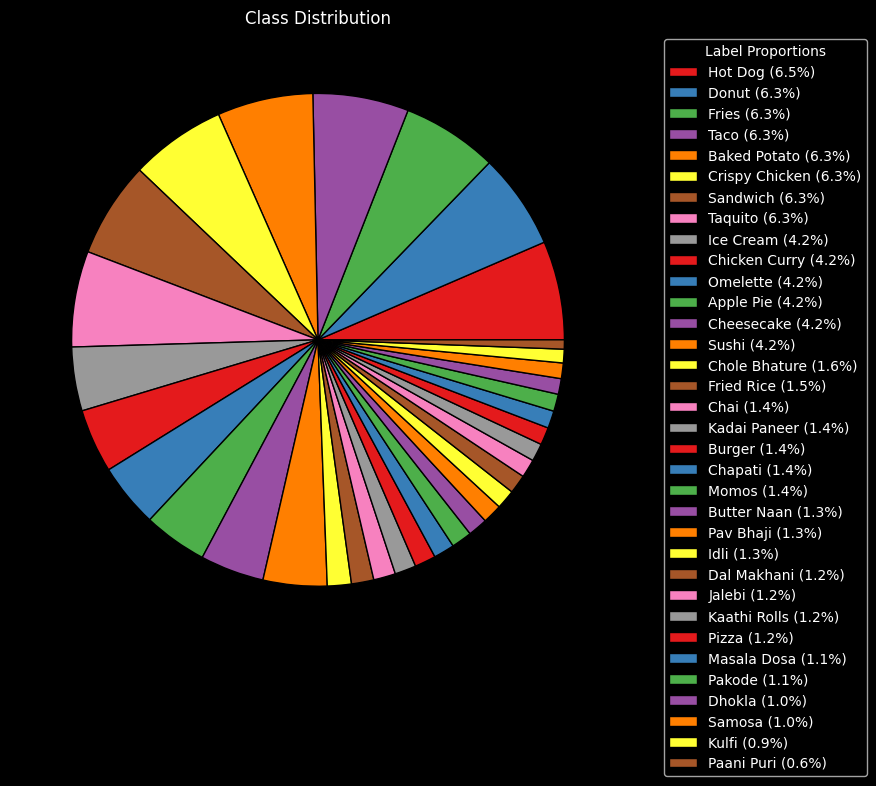

In [ ]:
FOOD_COUNTS = DF['Food_Name'].value_counts()
LABELS      = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(FOOD_COUNTS.index, FOOD_COUNTS / FOOD_COUNTS.sum() * 100)]

FOOD_COUNTS.plot(kind = 'pie', figsize = (24, 8), colors = sns.color_palette('Set1'), labels = None, wedgeprops = {'edgecolor': 'k'})
plt.title('Class Distribution')
plt.legend(title = 'Label Proportions', bbox_to_anchor = (1.05, 1), labels = LABELS)
plt.ylabel('')
plt.show()

**Note:**

  * Some classes have a high number of instances (e.g., Baked Potato, Crispy Chicken), while others have very few (e.g., Kaathi Rolls, Kulfi).
  * This imbalance can potentially bias the model towards the majority classes.

**Image Sample Previews**

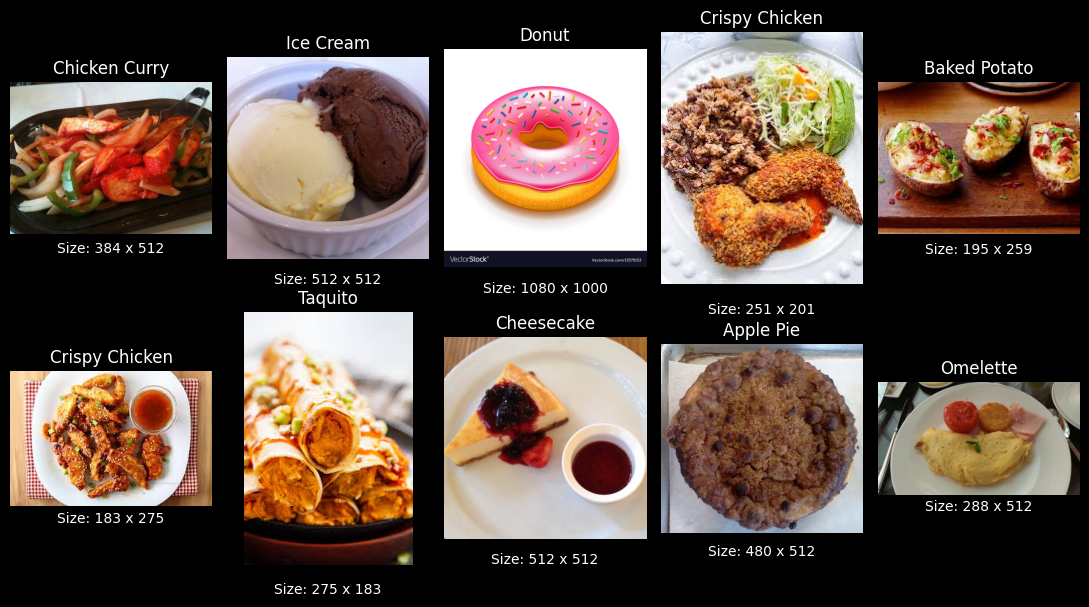

In [ ]:
fig, axes = plt.subplots(2, 5, figsize = (11, 6))

for I, (IMG_DIR, FOOD) in enumerate(PREVIEW.values):
  ROW = I // 5
  COL = I % 5
  IMG = plt.imread(IMG_DIR)
  axes[ROW, COL].imshow(IMG)
  axes[ROW, COL].set_title(FOOD)
  axes[ROW, COL].axis('off')
  axes[ROW, COL].text(0.5, -0.1, f'Size: {IMG.shape[0]} x {IMG.shape[1]}', ha = 'center', va = 'center', transform = axes[ROW, COL].transAxes)

plt.tight_layout()
plt.show()

**Note**

* The previews above clearly show images of the many different foods shot from multiple angles and lighting conditions with varying dimensions.

###**04. Image Preprocessing & Model Setup**

**Custom Transformer Class**

* To make your own transformer class, you firstly need to inherit two classes:

  * `BaseEstimator` which provides basic functionality.
  * `TransformerMixin` which combines the `fit()` and the `transform()` methods in your class.

* The `ImageTransformer` class is essentially going to prepare the image data for use by the Convolutional Neural Network (CNN) model.

* Here's a breakdown of what it does:

  * `__init__`:

    * Takes `test_split_size` as an argument (defaults to `0.2`), which determines the proportion of data to be used for testing.

    * Initializes placeholders for the training and validation data generators (`TRAIN_GEN`, `VALID_GEN`).

  * `fit`:

    * This method doesn't do much in this case, as it's mainly a placeholder required for compatibility with scikit-learn's `Pipeline` structure.
     
    * It simply just returns the instance of the transformer itself.

  * `transform`:

    * This is where the core functionality resides.

    * It first splits the input DataFrame (Data) into training, validation and test sets using train_test_split.
      * The splits are stratified to ensure class proportions are maintained across sets.

    * It then creates three `ImageDataGenerator` instances
      * One each for training, validation, and testing.
      * These generators are responsible for:

        * Rescaling pixel values to a range of 0 to 1.

        * Creating batches of data for efficient training.

      * The generators are configured to load images from the specified directories (`Image_Directory` column) and associate them with their corresponding labels (`Food_Name` column).

    * Finally, it returns the training and validation data generators (`TRAIN_GEN`, `VALID_GEN`).

<br>
(Shanding, 2023)

In [ ]:
class ImageTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, test_split_size = 0.2):
    self.test_split_size = test_split_size
    self.TRAIN_GEN       = None
    self.VALID_GEN       = None

  def fit(self, X, y = None):
    return self

  def transform(self, Data):
    self.Data = Data
    TRAIN_SPLIT, REST_SPLIT = train_test_split(self.Data, test_size = self.test_split_size, random_state = 42, stratify = DF['Food_Name'])
    VALID_SPLIT, TEST_SPLIT = train_test_split(REST_SPLIT, test_size = 0.5, random_state = 42, stratify = REST_SPLIT['Food_Name'])

    print('Image Transformation in progress...')

    self.TRAIN_GEN = ImageDataGenerator(rescale = (1. / 255)).flow_from_dataframe(
                      dataframe   = TRAIN_SPLIT,
                      directory   = None,
                      x_col       = 'Image_Directory',
                      y_col       = 'Food_Name',
                      target_size = (224, 224),
                      batch_size  = 32,
                      class_mode  = 'categorical',
                      seed        = 42
                     )

    self.VALID_GEN = ImageDataGenerator(rescale = (1. / 255)).flow_from_dataframe(
                      dataframe   = VALID_SPLIT,
                      directory   = None,
                      x_col       = 'Image_Directory',
                      y_col       = 'Food_Name',
                      target_size = (224, 224),
                      batch_size  = 32,
                      class_mode  = 'categorical',
                      seed        = 42
                     )

    self.TEST_GEN = ImageDataGenerator(rescale = (1. / 255)).flow_from_dataframe(
                      dataframe   = TEST_SPLIT,
                      directory   = None,
                      x_col       = 'Image_Directory',
                      y_col       = 'Food_Name',
                      target_size = (224, 224),
                      batch_size  = 32,
                      class_mode  = 'categorical',
                      seed        = 42
                    )

    print('Image transformation complete.')

    return self.TRAIN_GEN, self.VALID_GEN

**Model Architecture**

* Base Model (`MobileNetV2`)
  * A pre-trained model is used for feature extraction.
    * It's loaded up with the weights obtained from training on the *ImageNet* dataset.
  * The `include_top = False` argument excludes the final classification layers of MobileNetV2, allowing us to add custom layers for a specific task.
  * The `trainable = False` argument freezes the weights of the base model during training, preventing them from being updated.

* `GlobalMaxPooling2D`
  * This layer reduces the spatial dimensions of the feature maps extracted by the base model, converting them into a single vector per feature map.
  * Global max pooling selects the maximum value from each feature map, capturing the most important features.

* `Dense(1024, activation = 'relu')`
  * A fully connected layer with 1024 neurons is added.
    * It applies the ReLU (Rectified Linear Unit) activation function to introduce non-linearity and improve the model's ability to learn complex patterns.

* `Dense(num_classes, activation = 'softmax')`
  * The final layer is another fully connected layer with the number of neurons equal to the number of food classes in the dataset.
  * It uses the softmax activation function to produce a probability distribution over the classes, indicating the model's prediction for the input image.

* Optimizer
  * Adam optimizer is used for updating the model's weights during training.
  * It adapts the learning rate for each parameter, leading to faster convergence.

* Loss Function
  * Categorical cross-entropy is used as the loss function.
  * It measures the difference between the predicted probabilities and the true labels.

**Custom Classifier Class**

* The `ImageClassifier` class is designed to build and train a Convolutional Neural Network (CNN) for image classification, specifically for the food image dataset.
* Here's a breakdown of the functions:

  * Initialization (`__init__`):

    * Sets up hyperparameters `Epochs`, `Batch_Size`, and `Learning_Rate`.
    * Initializes the CNN model using the `model()` method.

  * Model Creation (`model`):

    * Creates a CNN model using `tensorflow.keras`.
    * Uses a pre-trained `MobileNetV2` model as a base, leveraging its learned features for image processing.
      * This is also called Transfer Learning.
    * Adding some custom layers on top of `MobileNetV2`.
      * These are the fully connected layers that do the actual classification.
    * Compiles the model, specifying the loss function, optimizer and evaluation metrics.
    
  * Training (`fit`):

    * Takes the training and validation data generators (`X_Gen`) as input.
    * States whether a GPU or CPU is being used for training.
    * Trains the model using the provided data for the specified number of epochs.
    * Prints the training and validation accuracy and loss over epochs using `matplotlib.pyplot`.



In [ ]:
class ImageClassifier(BaseEstimator):
  def __init__(self, Batch_Size = 32, Learning_Rate = 0.001, Epochs = 4):
    self.Epochs        = Epochs
    self.Batch_Size    = Batch_Size
    self.Learning_Rate = Learning_Rate
    self.Model         = self.model()

  def model(self):
    BASE           = MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
    BASE.trainable = False
    MODEL = Sequential([
                        BASE,
                        GlobalMaxPooling2D(),
                        Dense(1024, activation = 'relu'),
                        Dense(len(DF['Food_Name'].unique()), activation = 'softmax')
                      ])
    MODEL.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = self.Learning_Rate), metrics = ['accuracy'])

    return MODEL

  def fit(self, X_Gen, y = None):
    clear_output(wait = True)

    if tf.test.gpu_device_name():
      print('GPU currently in use.')
    else:
      print('CPU currently in use.')

    print("Training in progress...")

    Train_Gen, Valid_Gen = X_Gen

    self.Model.fit(Train_Gen, epochs = self.Epochs, batch_size = self.Batch_Size, validation_data = Valid_Gen, verbose = 0)
    clear_output(wait = True)

    print("Training complete!")

    HISTORY    = self.Model.history
    TRAIN_ACC  = HISTORY.history['accuracy']
    VALID_ACC  = HISTORY.history['val_accuracy']
    TRAIN_LOSS = HISTORY.history['loss']
    VALID_LOSS = HISTORY.history['val_loss']
    EPOCHS     = range(1, len(TRAIN_ACC) + 1)

    fig, axes = plt.subplots(1, 2, figsize = (12, 5))

    axes[0].plot(EPOCHS, TRAIN_ACC, label = 'Training')
    axes[0].plot(EPOCHS, VALID_ACC, label = 'Validation')
    axes[0].set_title('Accuracy Log')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylim(0.25, 1.00)
    axes[0].set_ylabel('Accuracy Factor')
    axes[0].set_xticks(EPOCHS)
    axes[0].legend()

    axes[1].plot(EPOCHS, TRAIN_LOSS, label = 'Training')
    axes[1].plot(EPOCHS, VALID_LOSS, label = 'Validation')
    axes[1].set_title('Loss Log')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('CCE Loss')
    axes[1].set_xticks(EPOCHS)
    axes[1].legend()

    for i in range(len(EPOCHS)):
      axes[0].text(EPOCHS[i], TRAIN_ACC[i], f'{TRAIN_ACC[i]:.2f}', ha = 'center', va = 'bottom', color = 'white')
      axes[0].text(EPOCHS[i], VALID_ACC[i], f'{VALID_ACC[i]:.2f}', ha = 'center', va ='bottom', color = 'white')

      axes[1].text(EPOCHS[i], TRAIN_LOSS[i], f'{TRAIN_LOSS[i]:.2f}', ha = 'center', va = 'bottom', color = 'white')
      axes[1].text(EPOCHS[i], VALID_LOSS[i], f'{VALID_LOSS[i]:.2f}', ha = 'center', va = 'bottom', color = 'white')

    plt.tight_layout()
    plt.show()

    return self

###**05. The Pipeline**





**Setup**

* `PIPE` will take the entire food image dataset as input and prepare it for the model to use.

* It will split the data into training and validation sets.

* It will then create the Convolutional Neural Network (CNN) model for image classification.

* Next, it will feed the prepared images to the model for training, where the model learns to identify patterns and features that distinguish different food categories.

* Finally, it will show how the model performed by displaying accuracy and loss line plots for the training and validation split.


In [ ]:
PIPE = Pipeline(steps = [('transform', ImageTransformer()), ('cnn', ImageClassifier())])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Execution**

* This line will execute the entire pipeline.
* It will first call the `'transform'` step to prepare the data, then pass the transformed data to the `'cnn'` step for model training and evaluation.*
* **NOTE:** This cell might take a while to finish running.


Training complete!


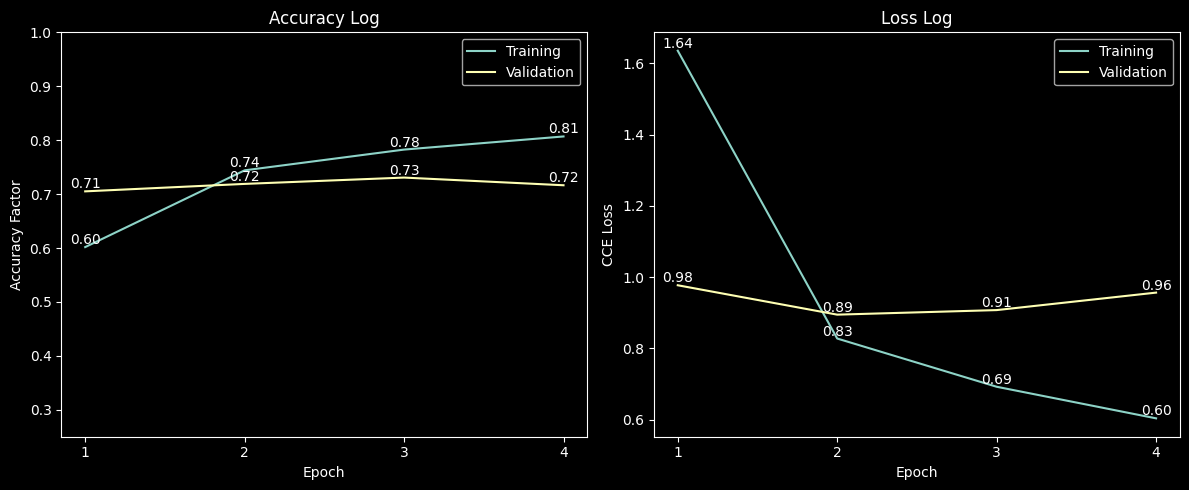

Pipeline(steps=[('transform', ImageTransformer()), ('cnn', ImageClassifier())])

In [ ]:
PIPE.fit(DF)

###**06. Test Predictions**

**Fetching Our Model, Class Labels & Test Data**

* Fetching the necessary objects from the `PIPE` pipeline for model testing.

In [ ]:
THE_MODEL = PIPE.named_steps['cnn'].Model
TEST_GEN  = PIPE.named_steps['transform'].TEST_GEN
LABELS    = list(PIPE.named_steps['transform'].TEST_GEN.class_indices.keys())

**Inference Predictions**

* Below we are making the test predictions and comparing them to the actual test labels after making an indexing fix.

In [ ]:
TEST_PREDS_ALL = []
TEST_TRUE_ALL  = []

for I in range(len(TEST_GEN)):
  X_BATCH, Y_BATCH = TEST_GEN[I]
  TEST_PREDS_BATCH = THE_MODEL.predict(X_BATCH)
  TEST_PREDS_BATCH = np.argmax(TEST_PREDS_BATCH, axis = 1)

  TEST_PREDS_ALL.extend(TEST_PREDS_BATCH)
  TEST_TRUE_ALL.extend(np.argmax(Y_BATCH, axis = 1))

TEST_PREDS_ALL = np.array(TEST_PREDS_ALL)
TEST_TRUE_ALL  = np.array(TEST_TRUE_ALL)

clear_output(wait = True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━

###**07. The Results**

**Classification Report**

In [ ]:
print(classification_report(TEST_TRUE_ALL, TEST_PREDS_ALL, target_names = LABELS, zero_division = False))

                precision    recall  f1-score   support

     Apple Pie       0.78      0.35      0.48       100
  Baked Potato       0.64      0.86      0.73       150
        Burger       0.84      0.94      0.89        33
   Butter Naan       0.61      0.74      0.67        31
          Chai       0.91      0.83      0.87        35
       Chapati       0.80      0.48      0.60        33
    Cheesecake       0.61      0.85      0.71       100
 Chicken Curry       0.74      0.75      0.74       100
 Chole Bhature       0.77      0.87      0.81        38
Crispy Chicken       0.91      0.61      0.73       150
   Dal Makhani       0.67      0.83      0.74        29
        Dhokla       0.93      0.58      0.72        24
         Donut       0.89      0.82      0.85       150
    Fried Rice       0.66      0.89      0.76        35
         Fries       0.92      0.76      0.83       150
       Hot Dog       0.71      0.70      0.71       155
     Ice Cream       0.61      0.86      0.72  

**Confusion Matrix**

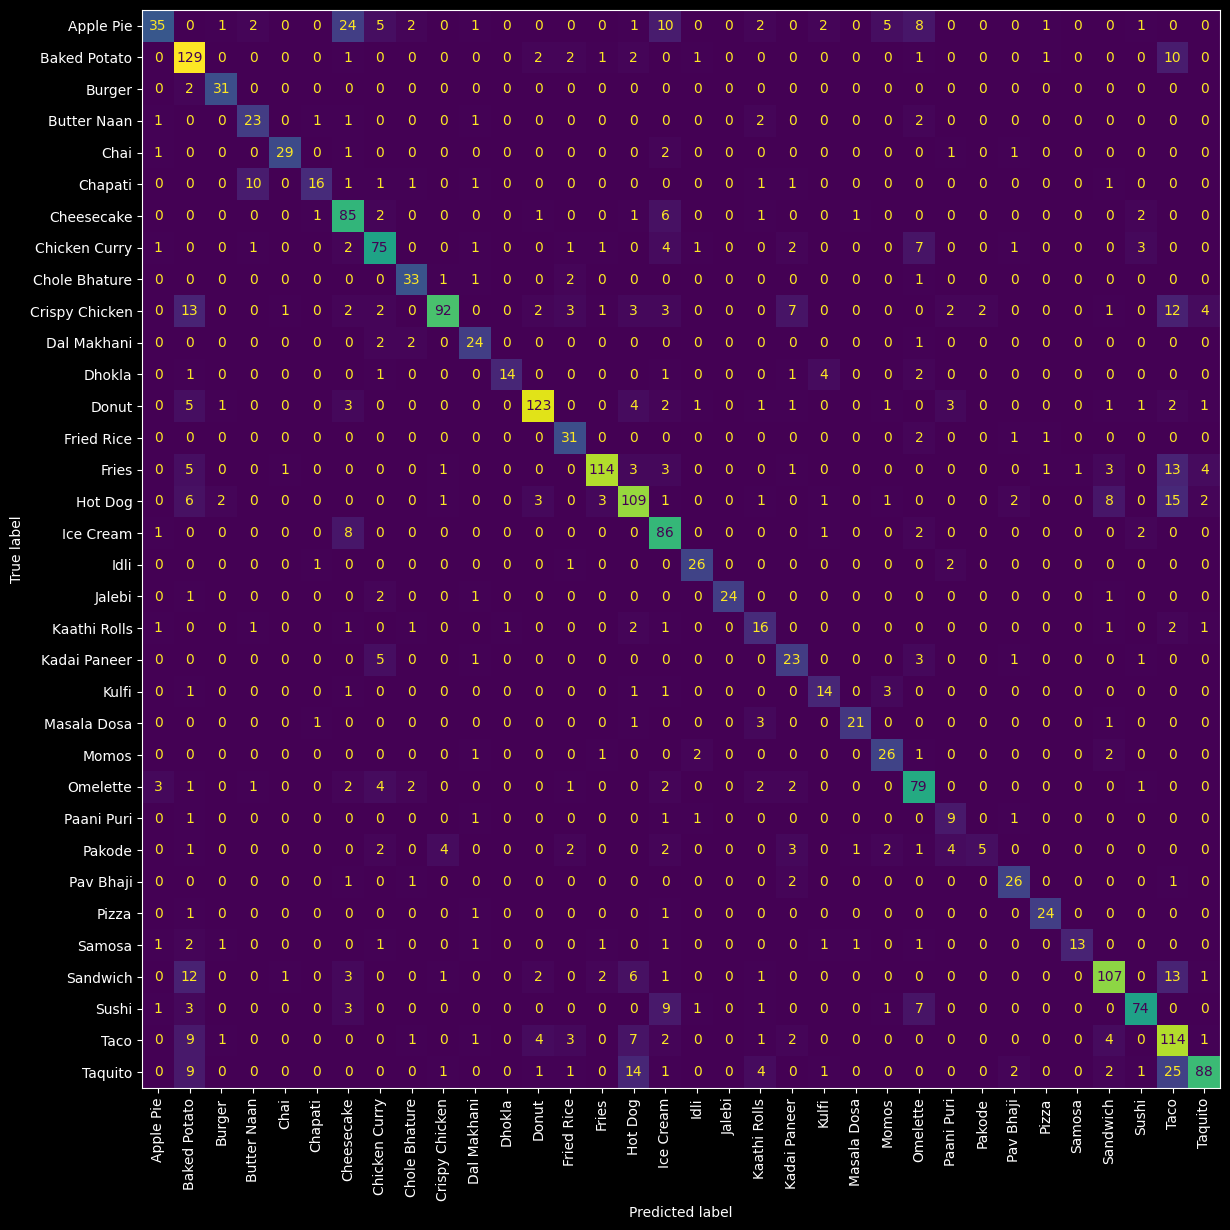

In [ ]:
CM      = confusion_matrix(TEST_TRUE_ALL, TEST_PREDS_ALL)
DISP    = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = LABELS)
FIG, AX = plt.subplots(figsize = (14, 14))

DISP.plot(ax = AX, xticks_rotation = 'vertical', colorbar = False)
plt.show()

### **08. Interpretation of Results**

* **Observations**
  *	The model performs well on most of the food classes with F1-scores greater than `0.70`.
  * Obviously some classes have a much higher support (number of samples) than others due to the class imbalance mentioned earlier.
  * Almost three-quarters of the test split samples were predicted correctly based on the accuracy score of `0.73`, indicating a fairly decent model.
  * The macro average F1-score of `0.72` and the weighted average F1-score of `0.73` are considered good but not great, there is room for improvement.

* **Discussion of Results**

  * Despite the class imbalance, there doesn't appear to be a clear correlation between support and F1-score, if we look at the classification report.
    * We see instances of classes with high support (like Baked Potato, Donut and Fries) having good F1-scores.
    * However, we also see classes with low support (like Burger and Pizza) having high F1-scores.
    * Conversely, some classes with high support (like Apple Pie and Taco) have relatively lower F1-scores.
      * This suggests that the relationship between support and F1-score is not straightforward in this case.
    * Other factors like the inherent difficulty of classifying certain classes  and the model's ability to learn features for each class likely play a more significant role in determining the F1-score.
        * For example, Certain foods are a little more distinct in shape or appearance which probably made them easier to identify, despite having lower support values.
    * Misclassifications were probably due to similarity in features
      * For example, if we take a look at the confusion matrix:
        * 24 Apple Pie images were incorrectly classified as Cheesecake, due to how similar the slices in the picture looked.
        * 15 Hot Dog images were incorrectly classified as Taco, probably due to the curved shape of the bread.

  * Here are some other notable factors that support the above claim:
    *	High Precision, Low Recall
      * In some classes (e.g. Apple Pie and Crispy Chicken), we observe high precision but very low recall.
      * This suggests that the model is kind of conservative in predicting these classes, often missing actual positive instances (false negatives).
    *	Low Precision, High Recall
      * Conversely, some classes (e.g. Cheesecake, Ice Cream and Taco) exhibit lower precision but high recall.
      * This indicates that the model is overly aggressive in predicting these classes which led to a high number of false positives.


* **Recommendations for Improvement**

  * Hyperparameter Tuning
    *	Regularization
      * Add regularization parameters (e.g. L1 or L2) to prevent overfitting, especially when dealing with imbalanced datasets.
    *	Learning Rate
      * I could try out different learning rates to ensure optimal convergence.
    *	Model Architecture
      * I could explore deeper or wider architectures such as *EfficientNet*, *VGG16* or *ResNet*.
  *	Feature Engineering
    * Data Augmentation
      * This applies random transformations to my images to artificially expand the dataset.
  * Additional Computing Resources
    * The model was trained on the T4 GPU offered by *Google Colab*
      * It is not powerful enough to enable a higher number of epochs for training without a runtime usage warning.
    * A stronger GPU will be considered for future developments to allow longer training times.


* **Alternative Modelling Strategies**
  *	Ensemble Methods
    * Integrating algorithms such as Random Forest or Gradient Boosting can often handle imbalanced classes and non-linear relationships a lot better.



### **09. References**

* Abiyev, R. et al. (2020) 'Deep learning methods for image classification', *Journal of Healthcare Engineering*, 2020, Article ID 7442218. Available at: https://pmc.ncbi.nlm.nih.gov/articles/PMC7442218/ (Accessed: 17 November 2024).

* Albawi, S., Mohammed, T.A. and Al-Zawi, S. (2017) 'Understanding of a convolutional neural network', *International Journal of Modern Education and Computer Science*, 9(11), pp. 14-24. Available at: https://doi.org/10.5815/ijmecs.2017.11.02

* Goodfellow, I., Bengio, Y. and Courville, A. (2016) *Deep learning*. Cambridge, MA: MIT Press. Available at: https://mitpress.mit.edu/books/deep-learning

* Krizhevsky, A., Sutskever, I. and Hinton, G.E. (2012) 'Imagenet classification with deep convolutional neural networks', *Advances in Neural Information Processing Systems*, 25, pp. 1097-1105. Available at: https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

* LeCun, Y., Boser, B., Denker, J. S., Henderson, D., Howard, R. E., Hubbard, W., & Jackel, L. D. (1989) 'Backpropagation applied to handwritten zip code recognition', *Neural Computation*, 1(4), pp. 541-551. Available at: https://doi.org/10.1162/neco.1989.1.4.541

* Papers with Code (n.d.) *Image Classification*. Available at: https://paperswithcode.com/task/image-classification (Accessed: 17 November 2024).

* Rawat, W. and Wang, Z. (2017) 'Deep convolutional neural networks for image classification: A comprehensive review', *Neural Computation*, 29(9), pp. 2352-2449. Available at: https://doi.org/10.1162/NECO_a_00990

* Shanding, P. G., 2023. Creating Custom Transformers in Python and scikit-learn. [Online] Available at: https://medium.com/@pgshanding/creating-custom-transformers-in-python-and-scikit-learn-10767487017e#:~:text [Accessed 10 November 2024].

* Taha, M. et al. (2023) 'Efficient deep learning techniques for image classification: A comprehensive review', *Applied Sciences*, 4(3), p. 33. Available at: https://www.mdpi.com/2673-2688/4/3/33 (Accessed: 17 November 2024).

* Viso.AI (n.d.) *Image Classification*. Available at: https://viso.ai/computer-vision/image-classification/ (Accessed: 17 November 2024).

* University of Zurich (n.d.) *Publications*. Available at: https://mim.ifi.uzh.ch/static/publications.html (Accessed: 17 November 2024).

* Zhang, Z. et al. (2020) 'Deep convolutional neural networks for remote sensing image classification: A review', *Remote Sensing*, 13(22), p. 4712. Available at: https://www.mdpi.com/2072-4292/13/22/4712 (Accessed: 17 November 2024).


<center> <b> <font size = 5> End of Notebook </b> </center>